In [30]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data
import yfinance as yf

In [34]:
start_date = '2014-01-01'
end_date = '2018-01-01'
goog_data = yf.download("GOOG", start="2014-01-01", end="2018-01-01")
print(goog_data.head())

[*********************100%***********************]  1 of 1 completed
                                Open       High        Low      Close  \
Date                                                                    
2014-01-02 00:00:00-05:00  27.782366  27.839401  27.603037  27.724083   
2014-01-03 00:00:00-05:00  27.770908  27.818977  27.520098  27.521841   
2014-01-06 00:00:00-05:00  27.721344  27.867046  27.557707  27.828691   
2014-01-07 00:00:00-05:00  28.019974  28.385853  27.924334  28.365179   
2014-01-08 00:00:00-05:00  28.543015  28.575891  28.226450  28.424210   

                           Adj Close     Volume  
Date                                             
2014-01-02 00:00:00-05:00  27.724083   73129082  
2014-01-03 00:00:00-05:00  27.521841   66917888  
2014-01-06 00:00:00-05:00  27.828691   71037271  
2014-01-07 00:00:00-05:00  28.365179  102486711  
2014-01-08 00:00:00-05:00  28.424210   90036218  


In [38]:
goog_data_signal = pd.DataFrame(index = goog_data.index)
goog_data_signal['price'] = goog_data['Adj Close']
goog_data_signal['daily_difference'] = goog_data_signal['price'].diff()
print(goog_data_signal.head())

                               price  daily_difference
Date                                                  
2014-01-02 00:00:00-05:00  27.724083               NaN
2014-01-03 00:00:00-05:00  27.521841         -0.202242
2014-01-06 00:00:00-05:00  27.828691          0.306850
2014-01-07 00:00:00-05:00  28.365179          0.536488
2014-01-08 00:00:00-05:00  28.424210          0.059031


In [45]:
goog_data_signal['signal'] = 0
goog_data_signal['signal'] = np.where(goog_data_signal['daily_difference'] >0,1,0)
goog_data_signal['positions'] = goog_data_signal['signal'].diff()

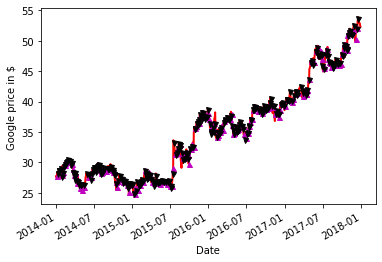

In [46]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
goog_data_signal['price'].plot(ax=ax1, color='r', lw=2)
ax1.plot(goog_data_signal.loc[goog_data_signal.positions == 1.0].index,goog_data_signal.price[goog_data_signal.positions == 1.0],'^', markersize=5, color='m')    
ax1.plot(goog_data_signal.loc[goog_data_signal.positions == -1.0].index,goog_data_signal.price[goog_data_signal.positions == -1.0],'v', markersize=5, color='k')
plt.show()

In [47]:
initial_capital = float(1000.0)
positions = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)
portfolio = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)

In [50]:
positions['GOOG'] = goog_data_signal['signal']
portfolio['positions'] = (positions.multiply(goog_data_signal['price'],
   axis=0))
portfolio['cash'] = initial_capital - (positions.diff().multiply(goog_data_signal['price'], axis=0)).cumsum()
portfolio['total'] = portfolio['positions'] + portfolio['cash']


In [53]:
portfolio.head()

,positions,cash,total
Date,,,
2014-01-02 00:00:00-05:00,0.000000,NaN,NaN
2014-01-03 00:00:00-05:00,0.000000,1000.000000,1000.000000
2014-01-06 00:00:00-05:00,27.828691,972.171309,1000.000000
2014-01-07 00:00:00-05:00,28.365179,972.171309,1000.536488
2014-01-08 00:00:00-05:00,28.424210,972.171309,1000.595518


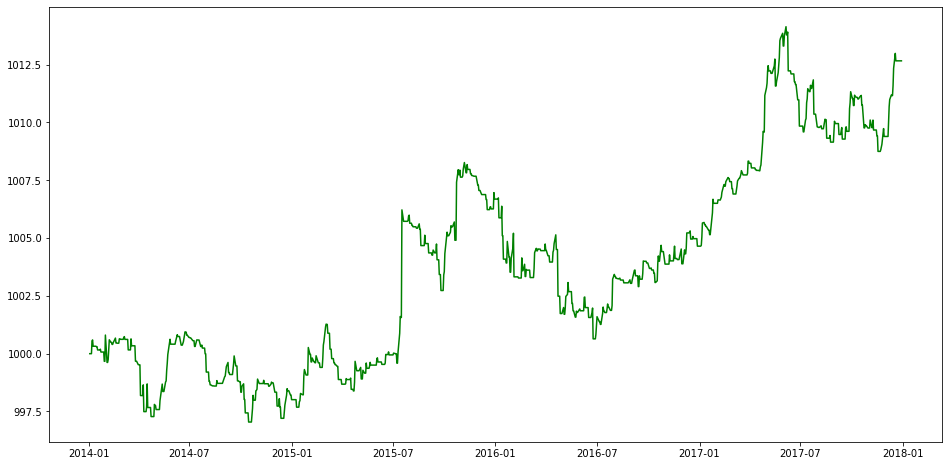

In [65]:
plt.figure(figsize = (16,8))
plt.plot(portfolio['total'], color = 'green', label = 'Total')
plt.show()